In [1]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn
!pip install seaborn

In [2]:
import string
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("netflix_data.csv")
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.fillna('', inplace=True)

In [8]:
print("\nMissing values in Movies DataFrame:")
print(df.isnull().sum())



Missing values in Movies DataFrame:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [9]:
df.describe(include='all').T

count unique  \
show_id         8807   8807   
type            8807      2   
title           8807   8807   
director        8807   4529   
cast            8807   7693   
country         8807    749   
date_added      8807   1768   
release_year  8807.0    NaN   
rating          8807     18   
duration        8807    221   
listed_in       8807    514   
description     8807   8775   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  6131   
title                                      Dick Johnson Is Dead     1   
director                                                         2634   
cast                                                              825   
country                                           United States  2818   
date_added                                      January 1, 2020   109   
release_year                                                NaN   NaN   
rating                                                    TV-MA  3207   
duration                                               1 Season  1793   
listed_in                          Dramas, International Movies   362   
description   Paranormal activity at a lush, abandoned prope...     4   

                     mean       std     min     25%     50%     75%     max  
show_id               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                  NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2014.180198  8.819312  1925.0  2013.0  2017.0  2019.0  2021.0  
rating                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description           NaN       NaN     NaN     NaN     NaN     NaN     NaN

In [10]:
###Number of Movies Released Each Year
movie_counts = df['release_year'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Number of Movies Released Each Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Movies')
)
fig.update_traces(marker_color='red')
fig.show()

In [11]:
import plotly.graph_objects as go

# Count the occurrences of each type
movie_type_counts = df['type'].value_counts()

# Create the pie chart
fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

# Update layout to make the plot smaller
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  # Dark background color for the plot
    paper_bgcolor='rgb(17, 17, 17)',  # Dark background color for the whole paper
    font_color='white',               # White font for readability
    title='Distribution of Types',    # Title of the chart
    height=600,                       # Set height to make the plot smaller
    width=600,                        # Set width to make the plot smaller
)

# Update trace colors (Red)
fig.update_traces(marker=dict(colors=['red']))

# Show the plot
fig.show()

In [12]:
###Top Countries with Highest Number of Movies
top_countries = df['country'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Countries with Highest Number of Movies',
)
fig.show()

In [13]:
### No of Movies Released by Country
country_movie_counts = df['country'].value_counts()

data = pd.DataFrame({'Country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                    color='Movie Count', title='Number of Movies Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Movie Count'].max()),
                    labels={'Movie Count': 'Number of Movies'})

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white'
)
fig.show()

In [14]:

### Movie Rtaings Distribution
ratings       = list(df['rating'].value_counts().index)
rating_counts = list(df['rating'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgb(0, 0, 1)',
    paper_bgcolor='rgb(0, 0, 1)',
    font=dict(
        color='white'
    )
)

fig.show()

In [16]:
ratings       = list(df['duration'].value_counts().index)
rating_counts = list(df['duration'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

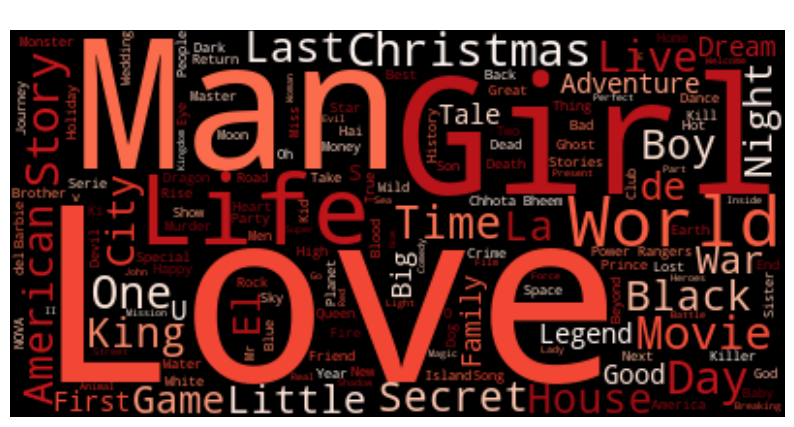

In [17]:
titles = df['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

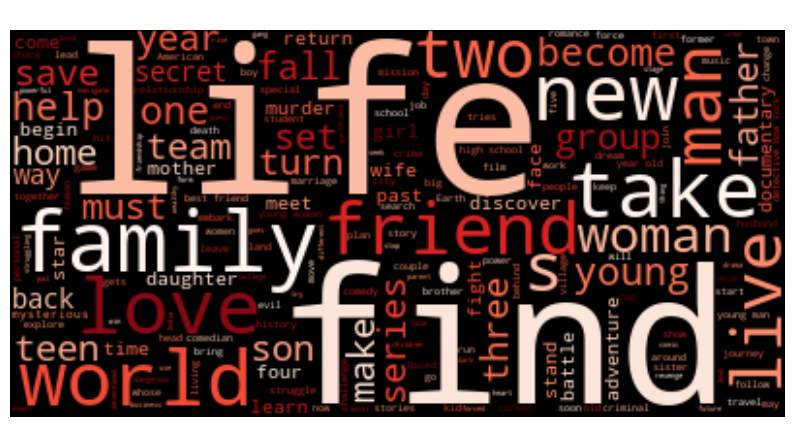

In [18]:
titles = df['description'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

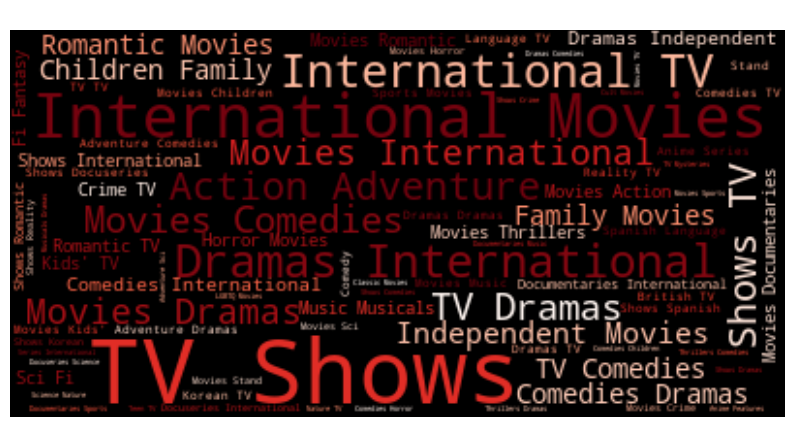

In [19]:
titles = df['listed_in'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

In [20]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water                    
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans                    
4         s5  TV Show           Kota Factory                    
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb                    
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                        United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...                  
3                                                                        
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                                     
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]

FEATURE ENGINEERING

In [21]:
new_data = df[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
new_data.set_index('title', inplace=True)

In [22]:
new_data.head()

type         director  \
title                                             
Dick Johnson Is Dead     Movie  Kirsten Johnson   
Blood & Water          TV Show                    
Ganglands              TV Show  Julien Leclercq   
Jailbirds New Orleans  TV Show                    
Kota Factory           TV Show                    

                                                                    cast  \
title                                                                      
Dick Johnson Is Dead                                                       
Blood & Water          Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
Ganglands              Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
Jailbirds New Orleans                                                      
Kota Factory           Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   

                      rating  \
title                          
Dick Johnson Is Dead   PG-13   
Blood & Water          TV-MA   
Ganglands              TV-MA   
Jailbirds New Orleans  TV-MA   
Kota Factory           TV-MA   

                                                               listed_in  \
title                                                                      
Dick Johnson Is Dead                                       Documentaries   
Blood & Water            International TV Shows, TV Dramas, TV Mysteries   
Ganglands              Crime TV Shows, International TV Shows, TV Act...   
Jailbirds New Orleans                             Docuseries, Reality TV   
Kota Factory           International TV Shows, Romantic TV Shows, TV ...   

                                                             description  
title                                                                     
Dick Johnson Is Dead   As her father nears the end of his life, filmm...  
Blood & Water          After crossing paths at a party, a Cape Town t...  
Ganglands              To protect his family from a powerful drug lor...  
Jailbirds New Orleans  Feuds, flirtations and toilet talk go down amo...  
Kota Factory           In a city of coaching centers known to train I...

In [23]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [24]:
cleaner = TextCleaner()

In [25]:
new_data['type']        = new_data['type'].apply(cleaner.remove_space)
new_data['director']    = new_data['director'].apply(cleaner.separate_text)
new_data['cast']        = new_data['cast'].apply(cleaner.separate_text)
new_data['rating']      = new_data['rating'].apply(cleaner.remove_space)
new_data['listed_in']   = new_data['listed_in'].apply(cleaner.separate_text)
new_data['description'] = new_data['description'].apply(cleaner.remove_punc)

In [26]:
new_data.head()

type         director  \
title                                            
Dick Johnson Is Dead    movie  kirsten johnson   
Blood & Water          tvshow                    
Ganglands              tvshow  julien leclercq   
Jailbirds New Orleans  tvshow                    
Kota Factory           tvshow                    

                                                                    cast  \
title                                                                      
Dick Johnson Is Dead                                                       
Blood & Water          greteli fincham xolile tshabalala shamilla mil...   
Ganglands              samuel jouy salim kechiouche noureddine farihi...   
Jailbirds New Orleans                                                      
Kota Factory           arun kumar ahsaas channa urvi singh mayur more...   

                      rating  \
title                          
Dick Johnson Is Dead   pg-13   
Blood & Water          tv-ma   
Ganglands              tv-ma   
Jailbirds New Orleans  tv-ma   
Kota Factory           tv-ma   

                                                               listed_in  \
title                                                                      
Dick Johnson Is Dead                                       documentaries   
Blood & Water              tv mysteries tv dramas international tv shows   
Ganglands              tv action & adventure international tv shows c...   
Jailbirds New Orleans                              docuseries reality tv   
Kota Factory           romantic tv shows international tv shows tv co...   

                                                             description  
title                                                                     
Dick Johnson Is Dead   as her father nears the end of his life filmma...  
Blood & Water          after crossing paths at a party a cape town te...  
Ganglands              to protect his family from a powerful drug lor...  
Jailbirds New Orleans  feuds flirtations and toilet talk go down amon...  
Kota Factory           in a city of coaching centers known to train i...

In [27]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [28]:
new_data.head()

BoW
title                                                                   
Dick Johnson Is Dead   movie kirsten johnson  pg-13 documentaries as ...
Blood & Water          tvshow  greteli fincham xolile tshabalala sham...
Ganglands              tvshow julien leclercq samuel jouy salim kechi...
Jailbirds New Orleans  tvshow   tv-ma docuseries reality tv feuds fli...
Kota Factory           tvshow  arun kumar ahsaas channa urvi singh ma...

In [29]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [30]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [31]:
cosine_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [32]:
np.save('tfidf_matrix.npy', tfid_matrix)
np.save('cosine_sim_matrix.npy', cosine_sim)

In [33]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [35]:
final_data = df[['title', 'type']]

In [36]:
final_data.head()

title     type
0   Dick Johnson Is Dead    Movie
1          Blood & Water  TV Show
2              Ganglands  TV Show
3  Jailbirds New Orleans  TV Show
4           Kota Factory  TV Show

In [38]:
final_data.to_csv('movie_data_Netflix.csv',index=False)

In [39]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim
    
    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]
        
        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']
        
        similar_movies = []
        similar_tv_shows = []
        
        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))
        
        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))
        
        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [40]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Shirkers
2. Frank and Cindy
3. Adam: His Song Continues
4. Walk Away from Love
5. Mom

Similar TV_show(s) list:
1. Diamond City
2. Kings of Jo'Burg
3. Lion Pride
4. Forget Me Not
5. Horrid Henry


In [41]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chappie', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. District 9
2. Real Steel
3. The Last Days of American Crime
4. 2036 Origin Unknown
5. Singularity
6. AlphaGo
7. Hardcore Henry
8. A Monster Calls
9. Equals

Similar TV_show(s) list:
1. Taken


In [42]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Kota Factory', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Chaman Bahaar
2. Anarkali of Aarah
3. Duniya
4. Super Nani

Similar TV_show(s) list:
1. Yeh Meri Family
2. Girls Hostel
3. Betaal
4. The Creative Indians
5. Single Ladies Senior
6. Sadqay Tumhare


In [43]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Dick Johnson Is Dead', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. How to Be a Player
2. End Game
3. Midnight Special
4. The Death and Life of Marsha P. Johnson
5. Small Soldiers
6. Woodshock
7. A Gray State
8. Win It All

Similar TV_show(s) list:
1. New Girl
2. Barbie Dreamhouse Adventures


In [44]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Dear White People', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Show
2. School Daze
3. The Vatican Tapes
4. God's Not Dead

Similar TV_show(s) list:
1. Better Call Saul
2. Bat Pat
3. Single Ladies Senior
4. Trotro
5. Life in Color with David Attenborough
6. Breaking Bad


In [45]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Squid Game', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Love (ft. Marriage and Divorce)
2. Prison Playbook
3. Hospital Playlist
4. Man to Man
5. Hello, Me!
6. Kingdom
7. Romance is a bonus book
8. Run On
9. Chief of Staff
10. The K2


In [46]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Lucifer', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Hope Springs Eternal
2. Nightcrawler
3. Chef

Similar TV_show(s) list:
1. Rica, Famosa, Latina
2. Monty Python's Fliegender Zirkus
3. On My Block
4. Marvel's Iron Fist
5. Spartacus
6. Girlfriends
7. Wassup Man GO!


# Testing other outputs

In [47]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('The Father Who Moves Mountains', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Package
2. 5Gang
3. Aiyaary
4. Neevevaro
5. Seven (Tamil)
6. The Babysitter
7. Seven (Telugu)
8. Chhota Bheem aur Krishna vs Zimbara
9. Waar

Similar TV_show(s) list:
1. Colony


In [48]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chhota Bheem', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Chhota Bheem - Neeli Pahaadi
2. Chhota Bheem and the Incan Adventure
3. Chhota Bheem: Bheem vs Aliens
4. Chhota Bheem & Ganesh
5. Chhota Bheem and The ShiNobi Secret
6. Chhota Bheem And The Crown of Valhalla
7. Chhota Bheem Aur Hanuman
8. Chhota Bheem: Dholakpur to Kathmandu
9. Chhota Bheem: The Rise of Kirmada
10. Chhota Bheem aur Krishna vs Zimbara

Similar TV_show(s) list:


In [49]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Naruto Shippuden the Movie: Blood Prison', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Naruto Shippuden : Blood Prison
2. Naruto Shippûden the Movie: Bonds
3. Naruto Shippûden the Movie: The Will of Fire
4. Naruto Shippuden: The Movie
5. Naruto Shippuden: The Movie: The Lost Tower
6. Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
7. Naruto the Movie: Ninja Clash in the Land of Snow
8. Naruto the Movie 2: Legend of the Stone of Gelel

Similar TV_show(s) list:
1. Naruto
2. ID-0


In [50]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Jaws', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Jaws 2
2. Jaws: The Revenge
3. Jaws 3
4. Indiana Jones and the Temple of Doom
5. Monster Hunter: Legends of the Guild
6. Mission Blue
7. In The Deep
8. Indiana Jones and the Last Crusade
9. Lincoln
10. Soul Surfer

Similar TV_show(s) list:


In [51]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('If I Leave Here Tomorrow: A Film About Lynyrd Skynyrd', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. No Direction Home: Bob Dylan
2. What Happened, Miss Simone?
3. Ronnie Coleman: The King
4. Diana: In Her Own Words
5. The Show Must Go On: The Queen + Adam Lambert Story
6. Biggie: I Got a Story to Tell
7. Billy Graham: An Extraordinary Journey
8. Dries
9. How the Beatles Changed the World

Similar TV_show(s) list:
1. Tabula Rasa


In [52]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Money Heist: From Tokyo to Berlin', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Money Heist: The Phenomenon

Similar TV_show(s) list:
1. The Creative Indians
2. Especial 20 años Fútbol de Primera
3. Rica, Famosa, Latina
4. El Dragón: Return of a Warrior
5. Nuestra Lucha Libre
6. Nicky Jam: El Ganador
7. Los 10 años de Peter Capusotto
8. Made in Mexico
9. Becoming Champions


In [53]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Q-Force', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Wanda Sykes: Not Normal
2. The Upshaws - The Afterparty
3. Hurricane Bianca: From Russia With Hate
4. Hating Peter Tatchell
5. Under the Eiffel Tower

Similar TV_show(s) list:
1. Danger Mouse: Classic Collection
2. Trial 4
3. Pawn Stars
4. Paul Hollywood's Big Continental Road Trip
5. The Great British Baking Show: Masterclass


In [54]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('House Party', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. House Party 2
2. House Party 3
3. Martin Lawrence Live: Runteldat
4. Steve Martin and Martin Short: An Evening You Will Forget for the Rest of Your Life
5. The Black Godfather
6. How to Be a Player
7. Born Beautiful
8. I Got the Hook Up
9. Mascots
10. A Thin Line Between Love & Hate

Similar TV_show(s) list:


In [55]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Poseidon', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Rumor Has It
2. The Binding
3. Dave Chappelle: Sticks & Stones
4. Mystic River
5. Cloverfield
6. Paranoia
7. In the Line of Fire
8. Seven in Heaven
9. Dil Se
10. Middle Men

Similar TV_show(s) list:


In [56]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Turning Point: 9/11 and the War on Terror', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Grandmother's Farm

Similar TV_show(s) list:
1. The Seventies
2. Terrorism Close Calls
3. Ajaibnya Cinta
4. The Eighties
5. Magical Andes
6. Naomi Osaka
7. 72 Dangerous Animals: Latin America
8. MeatEater
9. Juman


In [57]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Once Upon a Time in Mumbaai', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Ungli
2. Baadshaho
3. The Dirty Picture
4. Azhar
5. Raja Natwarlal
6. Tezz
7. Rock On!!
8. John Day
9. Encounter: The Killing
10. Colours of Passion

Similar TV_show(s) list:


In [58]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Boomika (Telugu)', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [59]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Boomika (Hindi)', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [60]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Boomika (Malayalam)', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [61]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Korean Cold Noodle Rhapsody', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. NOVA: Eclipse Over America
2. Trese After Dark
3. River, el más grande siempre

Similar TV_show(s) list:
1. Korean Pork Belly Rhapsody
2. Highland: Thailand's Marijuana Awakening
3. Wild Alaska
4. Street Food
5. Flavorful Origins
6. Chelsea
7. Classic Legends


In [62]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('O Kadhal Kanmani', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Bombay
2. Kannum Kannum Kollaiyadithaal
3. Game Over (Telugu Version)
4. Sillu Karuppatti
5. Game Over (Tamil Version)
6. Game Over (Hindi Version)
7. Mersal
8. Varane Avashyamund
9. CIA: Comrade in America
10. The Zoya Factor

Similar TV_show(s) list:


In [63]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Catch Me If You Can', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Before the Flood
2. Why We Fight: The Battle of Russia
3. Prelude to War
4. Raging Bull
5. Ocean's Eleven
6. The Departed
7. Inception
8. Lincoln
9. Click

Similar TV_show(s) list:
1. FIGHTWORLD


In [64]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Five Feet Apart', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Banana Split
2. John Henry
3. All Good Ones Get Away
4. Kung Fu Magoo
5. The Edge of Seventeen
6. Shutter Island
7. Big Daddy
8. Rakkhosh

Similar TV_show(s) list:
1. Jane The Virgin
2. Put Your Head on My Shoulder


In [65]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('My Girl', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. My Girl 2
2. Joan Didion: The Center Will Not Hold
3. Christmas with the Kranks
4. Movie 43
5. Like Crazy
6. Evolution
7. The End of the Tour
8. 50 First Dates

Similar TV_show(s) list:
1. Find Yourself
2. Secrets of Great British Castles


In [66]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Transformers: War for Cybertron: Kingdom', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Naruto Shippûden the Movie: Bonds
2. InuYasha the Movie 3: Swords of an Honorable Ruler
3. Inuyasha the Movie - La spada del dominatore del mondo

Similar TV_show(s) list:
1. Transformers: War for Cybertron: Earthrise
2. Transformers: War For Cybertron Trilogy
3. Naruto
4. EDENS ZERO
5. One-Punch Man
6. The Irregular at Magic High School
7. RESIDENT EVIL: Infinite Darkness


In [67]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('The Flash', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Dance Academy: The Comeback
2. Paradise Hills

Similar TV_show(s) list:
1. The Umbrella Academy
2. Sweet Tooth
3. DC's Legends of Tomorrow
4. Legacies
5. Shadow and Bone
6. The Legend of Korra
7. Chewing Gum
8. Atomic Puppet


In [68]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Sky Rojo', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Eye For An Eye

Similar TV_show(s) list:
1. Velvet
2. Apaches
3. Crime Diaries: The Candidate
4. Rica, Famosa, Latina
5. The House of Flowers
6. The Unremarkable Juanquini
7. Money Heist: From Tokyo to Berlin
8. Fugitiva
9. Elite Short Stories: Guzmán Caye Rebe


In [69]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Chhota Bheem: Dus Pe Dus', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Chhota Bheem and The ShiNobi Secret
2. Chhota Bheem and the Incan Adventure
3. Chhota Bheem - Neeli Pahaadi
4. Chhota Bheem: Dholakpur to Kathmandu
5. Chhota Bheem: The Rise of Kirmada
6. Chhota Bheem And The Crown of Valhalla
7. Chhota Bheem: Bheem vs Aliens
8. Chhota Bheem aur Krishna vs Zimbara
9. Chhota Bheem Aur Hanuman
10. Chhota Bheem And The Broken Amulet

Similar TV_show(s) list:


In [70]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Twilight', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Twilight Saga: Breaking Dawn: Part 2
2. Twilight
3. The Twilight Saga: Eclipse
4. The Twilight Saga: New Moon
5. Prom Night
6. The Vanished
7. Samson
8. Aftermath
9. Extraction
10. The Adventures of Sharkboy and Lavagirl

Similar TV_show(s) list:


In [71]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Never Have I Ever', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Beauty & the Beast
2. 12 Years Promise
3. Reply 1997
4. The In-Laws
5. Lugar de Mulher
6. Meteor Garden
7. White Nights
8. Ex-Boyfriend
9. Do Do Sol Sol La La Sol
10. Reply 1994


In [72]:
#33
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Bridgerton - The Afterparty', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Netflix Afterparty: The Best Shows of The Worst Year
2. Ginny & Georgia - The Afterparty
3. The Upshaws - The Afterparty
4. Bling Empire - The Afterparty
5. The Circle - The Afterparty
6. Cobra Kai - The Afterparty
7. Dad Stop Embarrassing Me - The Afterparty
8. Fate: The Winx Saga - The Afterparty
9. Fortune Feimster: Sweet & Salty

Similar TV_show(s) list:
1. The Netflix Afterparty


In [74]:
#34
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Kim's Convenience", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. NOVA: The Impossible Flight

Similar TV_show(s) list:
1. Narcoworld: Dope Stories
2. Shopkins
3. Prison Playbook
4. Cinta 100KG
5. Let’s Eat
6. Twogether
7. Color of Woman
8. Immortal Classic
9. Love Alarm


In [75]:
#35
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Grey's Anatomy", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Valentine's Day
2. Killers
3. How to Make an American Quilt

Similar TV_show(s) list:
1. Lenox Hill
2. The English Game
3. Melodies of Life - Born This Way
4. Refresh Man
5. Family Reunion
6. Turbo FAST
7. Firefly Lane


In [147]:
#input-36
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Kung Fu Panda", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kung Fu Panda: Holiday
2. Kung Fu Panda 2
3. Kung Fu Panda: Secrets of the Scroll
4. The Interview
5. By the Sea
6. Legendary Weapons of China
7. Seth Rogen's Hilarity for Charity
8. Love on Delivery
9. Next Gen

Similar TV_show(s) list:
1. DreamWorks Kung Fu Panda Awesome Secrets


In [77]:
#37th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Star Trek", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. For the Love of Spock
2. Terminator Salvation
3. Thor: Ragnarok
4. Like Crazy
5. Doom
6. Vantage Point
7. The Losers
8. Diana: 7 Days That Shook the World
9. Takers

Similar TV_show(s) list:
1. Star Trek: The Next Generation


In [78]:
#38th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("The Karate Kid", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Karate Kid Part III
2. The Karate Kid Part II
3. Cobra Kai - The Afterparty
4. Across Grace Alley
5. The Next Karate Kid
6. Dragonkala Ka Rahasya
7. Motu Patlu in Hong Kong: Kung Fu Kings 3
8. Enter the Dragon
9. Ip Man 3

Similar TV_show(s) list:
1. Cobra Kai


In [79]:
#39th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Somos.", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. A 3 Minute Hug

Similar TV_show(s) list:
1. Mar de Plástico
2. El Cartel
3. Four Seasons in Havana
4. El Cartel 2
5. Crime Diaries: The Candidate
6. Juana Inés
7. Ingobernable
8. Fugitiva
9. Magic for Humans Spain


In [81]:
#40th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Godzilla Singular Point", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Fate/Grand Order -First Order-

Similar TV_show(s) list:
1. EDENS ZERO
2. Fullmetal Alchemist
3. DRAGON PILOT: Hisone & Masotan
4. Ninja Hattori
5. Kuromukuro
6. Teasing Master Takagi-san
7. Ouran High School Host Club
8. JoJo's Bizarre Adventure
9. Monthly Girls' Nozaki Kun


In [82]:
#41th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("L.A.’s Finest", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. I AM A KILLER: RELEASED
2. Forensic Files
3. The Truth Seekers
4. Narcoworld: Dope Stories
5. Brews Brothers
6. Get Even
7. Fukrey Boyzzz
8. Sab Jholmaal Hai
9. The Lizzie Borden Chronicles
10. Making a Murderer


In [83]:
#42th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Bo Burnham: Inside", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Bo Burnham: Make Happy
2. Bo Burnham: what.
3. Chris Rock: Tamborine
4. Ray Romano: Right Here, Around the Corner
5. Pete Davidson: Alive From New York
6. Mike Epps: Only One Mike
7. ADAM SANDLER 100% FRESH
8. Kevin Hart: I'm a Grown Little Man

Similar TV_show(s) list:
1. MONKART
2. Her Private Life


In [84]:
#43th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Love, Death & Robots", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Meyerowitz Stories (New and Selected)
2. Tremors 2: Aftershocks
3. Molly's Game
4. Michael Bolton's Big, Sexy Valentine's Day Special
5. Seabiscuit

Similar TV_show(s) list:
1. He-Man and the Masters of the Universe
2. All Hail King Julien: Exiled
3. Huntik: Secrets and Seekers
4. The Vampire Diaries
5. Night on Earth


In [85]:
#44th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Ram Prasad Ki Tehrvi", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Mimi
2. Gour Hari Dastaan: The Freedom File
3. Life in a ... Metro
4. Masoom
5. Shonar Pahar
6. Dolly Kitty Aur Woh Chamakte Sitare
7. Bazaar
8. Dedh Ishqiya
9. Love Per Square Foot

Similar TV_show(s) list:
1. The House That Made Me


In [86]:
#45th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Oloibiri", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Slow Country
2. Chief Daddy
3. Zero Hour
4. God Calling
5. 10 Days in Sun City
6. Love Is War
7. Gold Statue
8. The Wedding Party
9. NOVA: Day the Dinosaurs Died

Similar TV_show(s) list:
1. King of Boys: The Return of the King


In [87]:
#46th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Delhi Belly", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Vir Das: For India
2. Gollu Aur Pappu
3. Vir Das: Outside In - The Lockdown Special
4. Vir Das: Losing It
5. Vir Das: Abroad Understanding
6. Game
7. Santa Banta Pvt Ltd
8. Rowdy Rathore
9. Tribhanga - Tedhi Medhi Crazy
10. Mumbai Cha Raja

Similar TV_show(s) list:


In [88]:
#47th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Taare Zameen Par", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. PK
2. Dil Chahta Hai
3. Mauli
4. Secret Superstar
5. Andaz Apna Apna
6. Rang De Basanti
7. Dhanak
8. Deewana Main Deewana
9. Janaan
10. Mann

Similar TV_show(s) list:


In [89]:
#48th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("GANTZ:O", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Dragon Quest Your Story
2. A Silent Voice
3. NiNoKuni
4. BLAME!
5. GODZILLA City on the Edge of Battle
6. Mobile Suit Gundam: Char's Counterattack

Similar TV_show(s) list:
1. K
2. Your lie in April
3. One-Punch Man
4. Durarara!!


In [90]:
#49th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Gilmore Girls", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. A Christmas Catch
2. Friday the 13th
3. Thunder Force

Similar TV_show(s) list:
1. Gilmore Girls: A Year in the Life
2. One Day at a Time
3. Back to 1989
4. The Duchess
5. Dirty John
6. How to Get Away with Murder
7. No Good Nick


In [91]:
#50th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Uppena", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Haapus
2. Rivaaz
3. Thaandavam
4. Aaviri
5. Petta (Telugu Version)
6. Petta
7. Tughlaq Durbar
8. Tughlaq Durbar (Telugu)
9. Tum Milo Toh Sahi
10. R.K.Nagar

Similar TV_show(s) list:


In [92]:
#51th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Motu Patlu in the City of Gold", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Motu Patlu in Hong Kong: Kung Fu Kings 3
2. Motu Patlu in Octupus World
3. Motu Patlu: Deep Sea Adventure
4. Motu Patlu in the Game of Zones
5. Motu Patlu: Mission Moon
6. Motu Patlu in Dragon's World
7. Motu Patlu Dino Invasion
8. Motu Patlu in Wonderland
9. Motu Patlu the Superheroes – Super Villains from Mars
10. Motu Patlu: King of Kings

Similar TV_show(s) list:


In [93]:
#52th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Roohi", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Gunjan Saxena: The Kargil Girl
2. Stree
3. Famous in Ahmedabad
4. Ek Ladki Ko Dekha Toh Aisa Laga
5. Kai Po Che!
6. Santo Cachón
7. The 8th Night
8. Chup Chup Ke

Similar TV_show(s) list:
1. College Romance
2. Bh Se Bhade


In [94]:
#53th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("3 Idiots", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. PK
2. Rang De Basanti
3. Sanju
4. Ek Main Aur Ekk Tu
5. War Chhod Na Yaar
6. Oh Darling Yeh Hai India
7. No Entry
8. Andaz Apna Apna
9. Boom
10. Ferrari Ki Sawaari

Similar TV_show(s) list:


In [95]:
#54th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Seven Souls in the Skull Castle: Season Bird", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Seven Souls in the Skull Castle: Season Moon Jogen
2. Seven Souls in the Skull Castle: Season Wind
3. Seven Souls in the Skull Castle: Season Moon Kagen
4. Seven Souls in the Skull Castle: Season Flower
5. Seven Souls in the Skull Castle 2011
6. Banyuki
7. MOTHER
8. Mobile Suit Gundam III: Encounters in Space
9. FullMetal Alchemist

Similar TV_show(s) list:
1. Kantaro: The Sweet Tooth Salaryman


In [96]:
#55th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("The Pianist", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The 12th Man
2. In Darkness
3. The Exception
4. Defiance
5. The Saint
6. A Tale of Love and Darkness
7. Saving Mr. Banks
8. Dark Light
9. Rangoon

Similar TV_show(s) list:
1. Camp X


In [97]:
#56th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Yu-Gi-Oh!", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Winx Club
2. Transformers: Robots in Disguise
3. Bakugan: Armored Alliance
4. Pokémon Master Journeys: The Series
5. Dinosaur King
6. Iris
7. Barbie Life in the Dreamhouse
8. The Guild
9. World of Winx
10. The Jungle Book


In [98]:
#57th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("DOTA: Dragon's Blood", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Witcher: Nightmare of the Wolf
2. Brian Regan: On the Rocks
3. Brian Regan: Nunchucks and Flamethrowers
4. How to Train Your Dragon 2
5. Dragonheart

Similar TV_show(s) list:
1. Durarara!!
2. Stand Up and Away! with Brian Regan
3. Luv Kushh
4. DreamWorks How to Train Your Dragon Legends
5. Naruto


In [99]:
#58th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Jiu Jitsu", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kickboxer: Retaliation
2. Bang Rajan 2
3. Chhota Bheem: Bheem vs Aliens
4. Railroad Tigers
5. Triple Threat
6. The Hurt Business
7. Why We Fight: The Battle of Russia

Similar TV_show(s) list:
1. History of Swear Words
2. The Kindness Diaries
3. FIGHTWORLD


In [100]:
#59th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Çarsi Pazar", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Beynelmilel
2. Dedemin Fisi
3. Babamın Ceketi
4. Cinar Agaci
5. My Travel Buddy
6. Mucize
7. Dolemite Is My Name

Similar TV_show(s) list:
1. Money, Explained
2. Million Pound Menu
3. Criminal: Germany


In [101]:
#60th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Murder Among the Mormons", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Heist
2. Women Behind Bars
3. Cocaine Cowboys: The Kings of Miami
4. Trial By Media
5. Lo que la verdad esconde: El caso Asunta (Operacion Nenúfar)
6. I AM A KILLER: RELEASED
7. Bad Blood
8. Evil Genius
9. The Keepers
10. World's Most Wanted


In [102]:
#61th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Pelé", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Figures of Speech
2. The Speed Cubers
3. Senna
4. Human Nature
5. XV: Beyond the Tryline
6. Stop at Nothing: The Lance Armstrong Story
7. Elena
8. Radical: the Controversial Saga of Dada Figueiredo
9. Late Life: The Chien-Ming Wang Story
10. Les Bleus - Une autre histoire de France, 1996-2016

Similar TV_show(s) list:


In [103]:
#62th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Vincenzo", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Arthdal Chronicles
2. Mine
3. Miss Panda & Mr. Hedgehog
4. A Love So Beautiful
5. Mad for Each Other
6. Hospital Playlist
7. Tomorrow with You
8. Run On
9. K-POP Extreme Survival
10. My Holo Love


In [104]:
#62th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Perú: Tesoro escondido", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Guatemala: Heart of the Mayan World
2. Forever Chape
3. El fin de ETA
4. Marked
5. Alexis Viera: A Story of Surviving
6. Secrets of Her Majesty's Secret Service

Similar TV_show(s) list:
1. Strongland
2. Wild Alaska
3. Inside The Freemasons
4. Nuestra Lucha Libre


In [105]:
#63th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Xico's Journey", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. La Gran Ilusión
2. Whisky
3. Incredibles 2 (Spanish Version)
4. You've Got This
5. We Need to Talk
6. Bibi & Tina: Tohuwabohu Total

Similar TV_show(s) list:
1. The House of Flowers
2. Three Days of Christmas
3. Camelia la Texana
4. Lo que la vida me robó


In [106]:
#64th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Demon Slayer: Kimetsu no Yaiba", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Berserk: The Golden Age Arc III - The Advent

Similar TV_show(s) list:
1. Cagaster of an Insect Cage
2. Food Wars!: Shokugeki no Soma
3. Attack on Titan
4. Fate/Zero
5. Record of Grancrest War
6. Your lie in April
7. K
8. EDENS ZERO
9. Erased


In [107]:
#65th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Nailed It! Mexico", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Nailed It! France
2. The Great British Baking Show: The Beginnings
3. Rica, Famosa, Latina
4. Fit for Fashion
5. Nailed It! Spain
6. Made in Mexico
7. Nailed It! Germany
8. Bake Squad
9. El Dragón: Return of a Warrior
10. Haunted: Latin America


In [108]:
#66th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Korean Pork Belly Rhapsody", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Korean Cold Noodle Rhapsody
2. Age of Tanks
3. Reply 1997
4. The Blue Planet: A Natural History of the Oceans
5. Highland: Thailand's Marijuana Awakening
6. Persona
7. This Is Pop
8. Nurses Who Kill
9. American Experience: The Circus
10. The Keepers


In [109]:
#67th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("AK vs AK", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Bhavesh Joshi Superhero
2. Ugly
3. Ghost Stories
4. Udaan
5. Mubarakan
6. Kucch To Hai
7. Motu Patlu Dino Invasion
8. Bombay Talkies
9. Ek Ladki Ko Dekha Toh Aisa Laga

Similar TV_show(s) list:
1. Sacred Games


In [110]:
#68th input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Marvel Anime: X-Men", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Naruto Shippuden: The Movie: The Lost Tower
2. Naruto Shippûden the Movie: The Will of Fire

Similar TV_show(s) list:
1. Saint Seiya
2. LOST SONG
3. Cardcaptor Sakura
4. The Disastrous Life of Saiki K.
5. GRANBLUE FANTASY the Animation
6. Devilman Crybaby
7. Akame ga Kill!
8. No Game No Life


In [112]:
#69 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Marvel Anime: Wolverine", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Berserk: The Golden Age Arc I - The Egg of the King
2. Bleach the Movie: Hell Verse
3. Berserk: The Golden Age Arc II - The Battle for Doldrey

Similar TV_show(s) list:
1. Fullmetal Alchemist: Brotherhood
2. Naruto
3. Fullmetal Alchemist
4. Little Witch Academia
5. ID-0
6. Apaches
7. Bleach


In [113]:
#70 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Vir Das: Outside In - The Lockdown Special", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Vir Das: For India
2. Vir Das: Losing It
3. Vir Das: Abroad Understanding
4. Bulbul Can Sing
5. Gollu Aur Pappu
6. Delhi Belly
7. Alex Fernández: The Best Comedian in the World
8. Santa Banta Pvt Ltd
9. Albert Pinto Ko Gussa Kyun Aata Hai?

Similar TV_show(s) list:
1. Hasmukh


In [114]:
#71 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("André & his olive tree", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. For Grace
2. Hole in the Wall
3. Ghost of the Mountains
4. 42 Grams
5. Kingdom of Us
6. 99 Songs (Telugu)
7. 99 Songs (Tamil)

Similar TV_show(s) list:
1. What She Put on the Table
2. Lion Pride
3. Ainsley Eats the Streets


In [115]:
#72 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Emicida: AmarElo - It’s All For Yesterday", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Emicida: AmarElo - Live in São Paulo
2. Zulu Man in Japan
3. Once In A Lifetime Sessions with Noel Gallagher
4. Once in a Lifetime Sessions with Snow Patrol
5. Once In A Lifetime Sessions with TLC
6. Roots
7. Biggie: I Got a Story to Tell

Similar TV_show(s) list:
1. Rhythm + Flow
2. Glimpses of a Future
3. Vai Anitta


In [116]:
#73 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Ethos", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Clair Obscur
2. Leyla Everlasting
3. Love, Surreal and Odd

Similar TV_show(s) list:
1. Innocent
2. What Happens to My Family
3. Intersection
4. Şubat
5. Behzat Ç.
6. Bringing Sexy Back
7. Black Money Love


In [117]:
#74 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Trial 4", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kuldip Patwal: I Didn't Do It!

Similar TV_show(s) list:
1. Making a Murderer
2. The Innocence Files
3. This Is a Robbery: The World's Biggest Art Heist
4. A Perfect Crime
5. Inside the Real Narcos
6. 20 Minutes
7. Under Arrest
8. Bad Boy Billionaires: India
9. Narcoworld: Dope Stories


In [118]:
#75 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Trial 3", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [119]:
#76 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Trial 2", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [120]:
#77 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Ya no estoy aquí: Una conversación entre Guillermo del Toro y Alfonso Cuarón", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. ROMA
2. ROAD TO ROMA
3. Puss in Boots
4. Crimson Peak
5. Don't Be Afraid of the Dark
6. Hellboy
7. Pan's Labyrinth

Similar TV_show(s) list:
1. Five Came Back
2. The Day I Met El Chapo
3. Trollhunters


In [121]:
#78 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("The Good Detective", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. A Korean Odyssey
2. Voice
3. Touch Your Heart
4. Chief of Staff
5. My Sassy Girl
6. The Crowned Clown
7. Possessed
8. My Only Love Song
9. It's Okay to Not Be Okay
10. The Lies Within


In [122]:
#79 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("La Révolution", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Seventh Son
2. The Workshop
3. How to Be a Player

Similar TV_show(s) list:
1. Age of Tanks
2. Criminal: France
3. Emily in Paris
4. The One
5. Elite
6. Happy Jail
7. Thieves of the Wood


In [123]:
#80 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Batman: The Killing Joke", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Lego DC Comics: Batman Be-Leaguered
2. Marvel's Iron Man & Hulk: Heroes United
3. Iron Man & Captain America: Heroes United
4. LEGO: Marvel Super Heroes: Maximum Overload
5. Sad Hill Unearthed
6. The Boss Baby: Get That Baby!
7. LEGO Marvel Super Heroes: Avengers Reassembled!

Similar TV_show(s) list:
1. Sym-Bionic Titan
2. Revelations: The Masters of the Universe: Revelation Aftershow
3. The Boss Baby: Back in Business


In [124]:
#81 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Òlòtūré", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Moms at War
2. Who's the Boss
3. Catch.er
4. Fifty
5. The Island
6. Potato Potahto
7. Lara and the Beat
8. Wives on Strike
9. Wives on Strike: The Revolution
10. The First Lady

Similar TV_show(s) list:


In [125]:
#82 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Turkish Dance School", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kara Bela
2. Bana Masal Anlatma
3. Locked on You
4. Eyyvah Eyyvah
5. My Step Dad: The Hippie
6. Have You Ever Seen Fireflies? - Theatre Play
7. Money Trap
8. Babam ve Oğlum
9. Melle

Similar TV_show(s) list:
1. What Happens to My Family


In [126]:
#83 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Oktoberfest: Beer & Blood", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Shiny_Flakes: The Teenage Drug Lord
2. Prey
3. Christine
4. Eddie - Strongman
5. The Girl King

Similar TV_show(s) list:
1. Call Me Francis
2. Powder
3. Rust Valley Restorers
4. The Defeated
5. Blood Pact


In [127]:
#84 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("High & Low The Red Rain", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Road To High & Low
2. High & Low The Movie 2 / End of Sky
3. High & Low The Movie 3 / Final Mission
4. High & Low The Movie
5. DTC Yukemuri Junjo Hen From High & Low
6. Sol Levante
7. Banyuki
8. Takizawa Kabuki ZERO 2020 The Movie

Similar TV_show(s) list:
1. K
2. The Irregular at Magic High School


In [128]:
#85 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Aggretsuko", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Aggretsuko: We Wish You a Metal Christmas
2. Violet Evergarden: Eternity and the Auto Memory Doll

Similar TV_show(s) list:
1. DRAGON PILOT: Hisone & Masotan
2. One-Punch Man
3. Teasing Master Takagi-san
4. Puella Magi Madoka Magica
5. Beyblade: Metal Fusion
6. Sing On! Spain
7. The Seven Deadly Sins
8. GRANBLUE FANTASY the Animation


In [129]:
#86 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Nigerian Prince", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Green White Green (And All the Beautiful Colours in My Mosaic of Madness)
2. 2 Weeks in Lagos
3. 93 Days
4. Tango With Me
5. This Lady Called Life
6. The Devil Below
7. Doctor Bello
8. Morris from America
9. Taxi Driver
10. The Skin of the Wolf

Similar TV_show(s) list:


In [130]:
#87 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Oh My God", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Boss
2. Himmatwala
3. Yaar Gaddar
4. Disco Dancer
5. Project Marathwada
6. Phir Bhi Dil Hai Hindustani
7. Welcome
8. Mujrim
9. Aitraaz
10. Awara Paagal Deewana

Similar TV_show(s) list:


In [131]:
#88 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("How to Get Away with Murder", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. 21
2. Kay Dyache Bola
3. Doubt

Similar TV_show(s) list:
1. Lo que la verdad esconde: El caso Asunta (Operacion Nenúfar)
2. Law School
3. Gilmore Girls: A Year in the Life
4. Troy
5. Rake
6. Scream
7. Shadow of Truth


In [132]:
#88 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Especial 20 años Fútbol de Primera", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Money Heist: From Tokyo to Berlin
2. Rica, Famosa, Latina
3. Camarón Revolution
4. Nuestra Lucha Libre
5. Rosario Tijeras
6. Magic for Humans Spain
7. Street Food: Latin America
8. Haunted: Latin America
9. Cocaine Cowboys: The Kings of Miami
10. Nailed It! Spain


In [133]:
#89 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Thomas & Friends: Marvelous Machinery: World of Tomorrow", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Thomas & Friends: Marvelous Machinery: A New Arrival
2. Steam Team to the Rescue
3. Thomas & Friends: Thomas and the Royal Engine
4. Digs & Discoveries: All Track's Lead to Rome
5. Octonauts & the Great Barrier Reef
6. Octonauts & the Caves of Sac Actun
7. Octonauts & the Ring of Fire

Similar TV_show(s) list:
1. Octonauts: Above & Beyond
2. Thomas and Friends
3. Octonauts


In [134]:
#90 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Coronavirus, Explained", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:

Similar TV_show(s) list:
1. Pandemic: How to Prevent an Outbreak
2. 72 Cutest Animals
3. Nature's Great Events: Diaries
4. Glimpses of a Future
5. SuperNature: Wild Flyers
6. Babies
7. Night on Earth
8. Human: The World Within
9. Absurd Planet
10. City in the Sky


In [135]:
#91 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("دفعة القاهرة", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Grandmother's Farm Part 2
2. Grandmother's Farm
3. The End

Similar TV_show(s) list:
1. Juman
2. In the Bosom of a Thorn
3. My Pride
4. The Terminal
5. Black Crows
6. February 9
7. Feb-09


In [136]:
#92 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Isi & Ossi", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. System Crasher
2. Alles ist gut
3. Driven to Dance

Similar TV_show(s) list:
1. In the Bosom of a Thorn
2. The Duchess
3. Diagnosis
4. Juman
5. Girlfriends' Guide to Divorce
6. Bhaag Beanie Bhaag
7. Charité


In [137]:
#93 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Awe", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Ali & Ratu Ratu Queens
2. Rudy Habibie
3. Follow Me
4. Cemara's Family
5. What's Up With Love?
6. Love for Sale
7. Love for Sale 2
8. Bigger Fatter Liar
9. Galih dan Ratna

Similar TV_show(s) list:
1. Quarantine Tales


In [138]:
#93 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("The World's Most Extraordinary Homes", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Taylor Swift reputation Stadium Tour

Similar TV_show(s) list:
1. Serial Killer with Piers Morgan
2. Killer Women with Piers Morgan
3. Earth's Natural Wonders: Life at the Extremes
4. Paul Hollywood's Big Continental Road Trip
5. Horror Homes
6. Reggie Yates Outside Man
7. Greatest Events of WWII in Colour
8. The Mechanism
9. Find Yourself


In [139]:
#94 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Déjà Vu", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Girl's Revenge

Similar TV_show(s) list:
1. Memory Love
2. K.O. One Re-act
3. Happy 300 Days
4. KO One Return
5. Love Now
6. I Hear You
7. Love Around
8. Yanxi Palace: Princess Adventures
9. Be with You


In [140]:
#95 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("6-5=2", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Sigaram Thodu
2. Waarrior Savitri
3. Time Out
4. Roll With Me
5. Issaq
6. Beyond All Boundaries
7. Ram Teri Ganga Maili
8. Humpty Sharma Ki Dulhania

Similar TV_show(s) list:
1. Maharakshak: Aryan
2. Khelti Hai Zindagi Aankh Micholi


In [141]:
#96 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Final Destination 2", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Diabolical
2. The Final Destination
3. I'm Thinking of Ending Things
4. The Ritual
5. Jinxed

Similar TV_show(s) list:
1. One Day at a Time
2. Green Eggs and Ham
3. Queen of the South
4. Haunted
5. Back to 1989


In [142]:
#97 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Zubaan", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Kajraare
2. Jatts in Golmaal
3. ReMastered: Devil at the Crossroads
4. Blood Money
5. ReMastered: Who Killed Jam Master Jay?
6. Krish Trish and Baltiboy: Face Your Fears
7. A Very Country Christmas
8. BluffMaster!
9. Once In A Lifetime Sessions with Moby
10. Tell Me Who I Am

Similar TV_show(s) list:


In [143]:
#98 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("XX", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. The Invitation
2. Madness in the Desert
3. Tales From the Hood 2
4. Prospect
5. Faith, Hope & Love
6. Up in the Air

Similar TV_show(s) list:
1. Fear Files... Har Mod Pe Darr
2. America's Book of Secrets
3. The Tudors
4. In The Dark


In [144]:
#99 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Vroomiz", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. 최강전사 미니특공대 : 영웅의 탄생

Similar TV_show(s) list:
1. Miniforce
2. Power Battle Watch Car
3. Running Man
4. Sisyphus
5. Kongsuni and Friends
6. Iris
7. Cocomong
8. Flowering Heart
9. Run On


In [145]:
#100 input
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation("Terminator Salvation", total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Spider-Man 3
2. 9
3. Dragonheart: Vengeance
4. Clash of the Titans
5. Lady in the Water
6. Star Trek
7. Enola Holmes
8. Les Misérables
9. Rememory

Similar TV_show(s) list:
1. The Dark Crystal: Age of Resistance


# Error Analysis and Performance metrics


In [148]:
from scipy import sparse

sparse.save_npz("tfidf_matrix.npz", tfidf_matrix)  # instead of .npy


NameError: name 'tfidf_matrix' is not defined

In [149]:
import pickle

with open("tfidf_matrix.npy", "rb") as f:
    tfidf_matrix = pickle.load(f)


UnpicklingError: unpickling stack underflow

In [150]:
#Error Analysis

tfidf_matrix = sparse.load_npz("tfidf_matrix.npz")

In [151]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re

class FlixHubImproved:
    def __init__(self, df, tfidf_matrix):
        self.df = df.copy()
        self.tfidf_matrix = tfidf_matrix
        # Normalize titles and build a lookup
        self.df['title_normalized'] = self.df['title'].str.lower().str.strip()
        self.title_to_index = {t: i for i, t in enumerate(self.df['title_normalized'])}

    def find_id(self, title):
        title_normalized = title.lower().strip()
        return self.title_to_index.get(title_normalized, -1)

    def recommendation(self, title, total_result=10, same_type_preference=True):
        idx = self.find_id(title)
        if idx == -1:
            return [], []

        query_vector = self.tfidf_matrix[idx]
        similarity_scores = cosine_similarity(query_vector, self.tfidf_matrix).flatten()

        self.df['similarity'] = similarity_scores

        # Boost sequels with title match
        title_pattern = re.sub(r'[^a-zA-Z0-9 ]', '', title).lower()
        boost_mask = self.df['title_normalized'].str.contains(title_pattern) & (self.df.index != idx)
        self.df.loc[boost_mask, 'similarity'] += 0.5

        # Prefer same type (Movie/TV)
        if same_type_preference:
            query_type = self.df.loc[idx, 'type']
            primary = self.df[self.df['type'] == query_type].sort_values(by='similarity', ascending=False)
            secondary = self.df[self.df['type'] != query_type].sort_values(by='similarity', ascending=False)
            sorted_df = pd.concat([primary, secondary])
        else:
            sorted_df = self.df.sort_values(by='similarity', ascending=False)

        # Build recommendation list with diversity filtering
        rec_indices = []
        for i in sorted_df.index:
            if i == idx:
                continue
            if len(rec_indices) >= total_result:
                break
            if rec_indices:
                sims = cosine_similarity(self.tfidf_matrix[i], self.tfidf_matrix[rec_indices]).flatten()
                if sims.max() > 0.9:
                    continue
            rec_indices.append(i)

        recs = self.df.loc[rec_indices]
        movies = recs[recs['type'] == 'Movie']['title'].tolist()
        shows = recs[recs['type'] == 'TV Show']['title'].tolist()

        return movies, shows


In [153]:
#Check for Squid Game
flix = FlixHubImproved(df, tfidf_matrix)
movies, shows = flix.recommendation("Squid Game", total_result=10)

print("Movies:\n", movies)
print("TV Shows:\n", shows)


Movies:
 []
TV Shows:
 ['Love (ft. Marriage and Divorce)', 'Prison Playbook', 'Hospital Playlist', 'Man to Man', 'Hello, Me!', 'Kingdom', 'Romance is a bonus book', 'Run On', 'Chief of Staff', 'The K2']


In [154]:
#Check 2
flix = FlixHubImproved(df, tfidf_matrix)
movies, shows = flix.recommendation("Final Destination 2", total_result=10)

print("Movies:\n", movies)
print("TV Shows:\n", shows)


Movies:
 ['The Diabolical', 'The Final Destination', "I'm Thinking of Ending Things", 'The Ritual', 'Jinxed', 'Tracy Morgan: Staying Alive', 'Barbie Star Light Adventure', 'The Adventures of Sharkboy and Lavagirl', 'The Student', 'An Unfinished Life']
TV Shows:
 []


In [155]:
#Check 3
flix = FlixHubImproved(df, tfidf_matrix)
movies, shows = flix.recommendation("Demon Slayer: Kimetsu no Yaiba", total_result=10)

print("Movies:\n", movies)
print("TV Shows:\n", shows)


Movies:
 []
TV Shows:
 ['Cagaster of an Insect Cage', 'Food Wars!: Shokugeki no Soma', 'Attack on Titan', 'Fate/Zero', 'Record of Grancrest War', 'Your lie in April', 'K', 'EDENS ZERO', 'Erased', 'Magi: Adventure of Sinbad']


In [156]:
#Check 4
flix = FlixHubImproved(df, tfidf_matrix)
movies, shows = flix.recommendation("Blood & Water", total_result=10)

print("Movies:\n", movies)
print("TV Shows:\n", shows)


Movies:
 []
TV Shows:
 ['Diamond City', "Kings of Jo'Burg", 'Lion Pride', 'Forget Me Not', 'Horrid Henry', 'Accidentally in Love', 'Disappearance', 'Dive Club', 'Lugar de Mulher', 'The Keepers']


In [157]:
#Importing json file containing details of 103 recommendations i generated
import json

with open("recommendation_data.json", "r", encoding="utf-8") as f:
    recommendation_data = json.load(f)


In [158]:
# Normalize title and extract genres - Don't know what this is for!!!
df['title_normalized'] = df['title'].str.lower().str.strip()
df['genres'] = df['listed_in'].fillna('').str.lower().str.split(', ')
genre_lookup = dict(zip(df['title_normalized'], df['genres']))
title_to_index = {t: i for i, t in enumerate(df['title_normalized'])}


In [160]:
print(title_to_index)


{'dick johnson is dead': 0, 'blood & water': 1, 'ganglands': 2, 'jailbirds new orleans': 3, 'kota factory': 4, 'midnight mass': 5, 'my little pony: a new generation': 6, 'sankofa': 7, 'the great british baking show': 8, 'the starling': 9, 'vendetta: truth, lies and the mafia': 10, 'bangkok breaking': 11, 'je suis karl': 12, 'confessions of an invisible girl': 13, 'crime stories: india detectives': 14, 'dear white people': 15, "europe's most dangerous man: otto skorzeny in spain": 16, 'falsa identidad': 17, 'intrusion': 18, 'jaguar': 19, 'monsters inside: the 24 faces of billy milligan': 20, 'resurrection: ertugrul': 21, 'avvai shanmughi': 22, 'go! go! cory carson: chrissy takes the wheel': 23, 'jeans': 24, 'love on the spectrum': 25, 'minsara kanavu': 26, 'grown ups': 27, 'dark skies': 28, 'paranoia': 29, 'ankahi kahaniya': 30, 'chicago party aunt': 31, 'sex education': 32, 'squid game': 33, 'tayo and little wizards': 34, 'the father who moves mountains': 35, 'the stronghold': 36, 'ang

In [164]:
# Assumes you have: df, genre_lookup, recommendation_data already loaded
#Top-N Calculation

# Normalize title to index for safe lookup
df['title_normalized'] = df['title'].str.lower().str.strip()
title_to_index = {t: i for i, t in enumerate(df['title_normalized'])}
df['genres'] = df['listed_in'].fillna('').str.lower().str.split(', ')
genre_lookup = dict(zip(df['title_normalized'], df['genres']))

# Loop through each input and its recommendations
genre_overlap_scores = []

for i, rec_dict in enumerate(recommendation_data):
    if i >= len(df):
        continue  # skip if index exceeds dataset

    input_title = df.iloc[i]['title_normalized']
    input_genres = genre_lookup.get(input_title, [])

    # Combine movie + TV show recs
    recommendations = rec_dict['movies'] + rec_dict['tv_shows']

    # Count genre overlap matches
    matches = sum(
        1 for rec in recommendations
        if set(input_genres) & set(genre_lookup.get(rec.lower().strip(), []))
    )

    if len(recommendations) > 0:
        genre_overlap_ratio = matches / len(recommendations)
        genre_overlap_scores.append(genre_overlap_ratio)

# Summary
avg_overlap = sum(genre_overlap_scores) / len(genre_overlap_scores)
print(f" Avg Top-N Genre Overlap: {avg_overlap:.4f}")


 Avg Top-N Genre Overlap: 0.2139


In [166]:
from scipy import sparse

# Load the sparse TF-IDF matrix if you haven't already
tfidf_matrix_sparse = sparse.load_npz("tfidf_matrix.npz")


In [168]:
# Checking ILS
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

ils_scores = []

for rec in recommendation_data:
    rec_titles = [t.lower().strip() for t in rec['movies'] + rec['tv_shows']]
    rec_indices = [title_to_index[t] for t in rec_titles if t in title_to_index]

    if len(rec_indices) < 2:
        ils_scores.append(0.0)
        continue

    rec_vectors = tfidf_matrix_sparse[rec_indices]
    pairwise_sim = cosine_similarity(rec_vectors)

    # Get upper triangle (excluding self-pairs)
    upper_indices = np.triu_indices(len(rec_indices), k=1)
    similarities = pairwise_sim[upper_indices]

    ils_scores.append(np.mean(similarities))

avg_ils = np.mean(ils_scores)
print(f" Avg ILS (Diversity): {avg_ils:.4f}")


 Avg ILS (Diversity): 0.0929


In [169]:
#Novelty

from collections import defaultdict

recommendation_counts = defaultdict(int)

for rec in recommendation_data:
    titles = [t.lower().strip() for t in rec['movies'] + rec['tv_shows']]
    for title in titles:
        recommendation_counts[title] += 1

unique_titles = len(recommendation_counts)
long_tail_titles = [title for title, count in recommendation_counts.items() if count == 1]
novelty_ratio = len(long_tail_titles) / unique_titles

print(f"Novelty (Long-tail Ratio): {novelty_ratio:.4f}")


Novelty (Long-tail Ratio): 0.8896


In [170]:
#Catelog Coverage

all_recommended_titles = set()

for rec in recommendation_data:
    all_recommended_titles.update([t.lower().strip() for t in rec['movies'] + rec['tv_shows']])

catalog_size = len(df)
coverage_ratio = len(all_recommended_titles) / catalog_size

print(f" Catalog Coverage: {coverage_ratio:.4f}")


 Catalog Coverage: 0.0998
